<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/2024_11_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

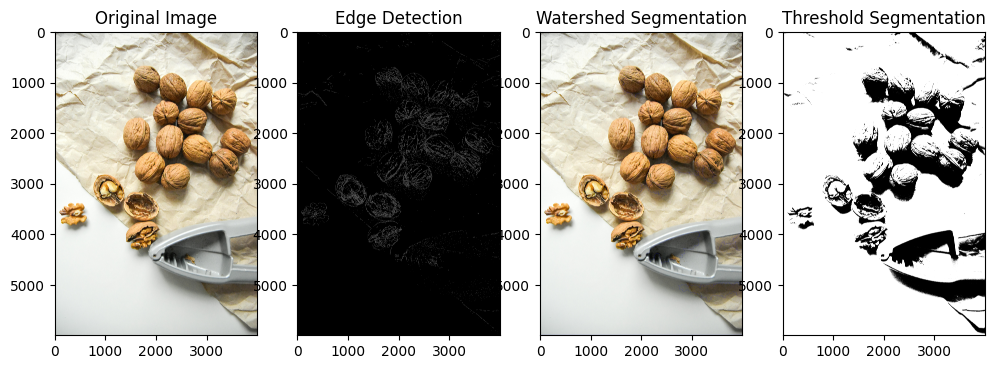

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载彩色图像
image = cv2.imread('./1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 将BGR转换为RGB用于显示

# 方法1: 边缘检测（Canny边缘检测）
edges = cv2.Canny(image, 100, 200)

# 方法2: 分水岭算法
# 转换为灰度图像并进行阈值处理得到二值图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 去除噪声
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# 标记
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# 分水岭算法
markers = cv2.watershed(image, markers)
image_watershed = image.copy()
image_watershed[markers == -1] = [255, 0, 0]  # 标记边界为蓝色

# 方法3: 阈值分割（对彩色图像的灰度处理）
_, thresh_segmentation = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 显示结果
plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(image_watershed, cv2.COLOR_BGR2RGB)), plt.title('Watershed Segmentation')
plt.subplot(1, 4, 4), plt.imshow(thresh_segmentation, cmap='gray'), plt.title('Threshold Segmentation')
plt.show()


分水岭算法基于图像的梯度信息，将像素看作地形，通过"水流"寻找边界，适合分割重叠或相接的对象，但对噪声敏感；边缘检测通过计算图像的梯度或二阶导数来提取灰度变化显著的边缘，适合轮廓清晰的对象，典型的算法有Canny，鲁棒性好；阈值分割则是一种简单直接的分割方法，通过设置阈值将像素分类，适合处理亮度差异明显的区域，计算效率高，但对复杂场景表现较弱。